## Libraries

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from pandas.plotting import scatter_matrix

## Versions

In [2]:
items = [("Numpy", np), ("Pandas", pd), ("Matplotlib", matplotlib), ("Seaborn", sns)]
for item in items:
    print(item[0] + " version: " + str(item[1].__version__))

Numpy version: 1.13.0
Pandas version: 0.20.1
Matplotlib version: 2.0.2
Seaborn version: 0.7.1


## Get Data

In [3]:
path = '/Users/davidziganto/data/'
X = pd.read_hdf(path + 'raw_HIGGS_training_data.h5', key='/a')

#### Dataframe Metadata

In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8800000 entries, 0 to 8799999
Data columns (total 29 columns):
lepton_pT                   float64
lepton_eta                  float64
lepton_phi                  float64
missing_energy_magnitude    float64
missing_energy_phi          float64
jet_1_pt                    float64
jet_1_eta                   float64
jet_1_phi                   float64
jet_1_b_tag                 float64
jet_2_pt                    float64
jet_2_eta                   float64
jet_2_phi                   float64
jet_2_b_tag                 float64
jet_3_pt                    float64
jet_3_eta                   float64
jet_3_phi                   float64
jet_3_b_tag                 float64
jet_4_pt                    float64
jet_4_eta                   float64
jet_4_phi                   float64
jet_4_b_tag                 float64
m_jj                        float64
m_jjj                       float64
m_lv                        float64
m_jlv                  

#### Dataframe Stats

In [5]:
X.describe()

,lepton_pT,lepton_eta,lepton_phi,missing_energy_magnitude,missing_energy_phi,jet_1_pt,jet_1_eta,jet_1_phi,jet_1_b_tag,jet_2_pt,...,jet_4_phi,jet_4_b_tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb,label
count,8.800000e+06,8.800000e+06,8.800000e+06,8.800000e+06,8.800000e+06,8.800000e+06,8.800000e+06,8.800000e+06,8.800000e+06,8.800000e+06,...,8.800000e+06,8.800000e+06,8.800000e+06,8.800000e+06,8.800000e+06,8.800000e+06,8.800000e+06,8.800000e+06,8.800000e+06,8.800000e+06
mean,9.913941e-01,1.812409e-05,1.202841e-04,9.984791e-01,5.835181e-06,9.908479e-01,2.606389e-04,-3.532179e-05,1.000262e+00,9.927417e-01,...,5.687584e-05,9.999597e-01,1.034230e+00,1.024742e+00,1.050579e+00,1.009769e+00,9.729928e-01,1.032995e+00,9.597752e-01,5.299822e-01
std,5.652263e-01,1.008586e+00,1.006298e+00,6.000232e-01,1.006288e+00,4.747621e-01,1.009313e+00,1.005880e+00,1.027835e+00,4.999808e-01,...,1.006427e+00,1.400219e+00,6.744872e-01,3.806125e-01,1.646171e-01,3.973941e-01,5.253820e-01,3.651302e-01,3.132078e-01,4.991003e-01
min,2.746966e-01,-2.434976e+00,-1.742508e+00,2.370088e-04,-1.743944e+00,1.376856e-01,-2.969725e+00,-1.741237e+00,0.000000e+00,1.889811e-01,...,-1.742691e+00,0.000000e+00,7.507046e-02,1.986757e-01,9.105575e-02,1.320062e-01,4.786215e-02,3.033497e-01,3.307214e-01,0.000000e+00
25%,5.907533e-01,-7.383225e-01,-8.713760e-01,5.767606e-01,-8.711415e-01,6.789927e-01,-6.872450e-01,-8.680962e-01,0.000000e+00,6.565868e-01,...,-8.714789e-01,0.000000e+00,7.906016e-01,8.462433e-01,9.857537e-01,7.675782e-01,6.738682e-01,8.194112e-01,7.704077e-01,0.000000e+00
50%,8.533714e-01,-5.415563e-05,3.137559e-04,8.915848e-01,1.726837e-04,8.948193e-01,9.647943e-04,5.813991e-05,1.086538e+00,8.902636e-01,...,-2.642369e-04,0.000000e+00,8.949509e-01,9.507075e-01,9.897785e-01,9.165673e-01,8.734035e-01,9.473388e-01,8.720073e-01,1.000000e+00
75%,1.236226e+00,7.382142e-01,8.715489e-01,1.292821e+00,8.714930e-01,1.170740e+00,6.881843e-01,8.683126e-01,2.173076e+00,1.201875e+00,...,8.716055e-01,3.101961e+00,1.024787e+00,1.083460e+00,1.020473e+00,1.142384e+00,1.138526e+00,1.140438e+00,1.059230e+00,1.000000e+00
max,1.209891e+01,2.434868e+00,1.743236e+00,1.539682e+01,1.743257e+00,9.940391e+00,2.969674e+00,1.741454e+00,2.173076e+00,1.164708e+01,...,1.743372e+00,3.101961e+00,4.019237e+01,2.037278e+01,7.992739e+00,1.426244e+01,1.776285e+01,1.149652e+01,8.374498e+00,1.000000e+00


#### Correlation Matrix

In [6]:
X.corr()

,lepton_pT,lepton_eta,lepton_phi,missing_energy_magnitude,missing_energy_phi,jet_1_pt,jet_1_eta,jet_1_phi,jet_1_b_tag,jet_2_pt,...,jet_4_phi,jet_4_b_tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb,label
lepton_pT,1.000000,-0.000346,-0.000083,-0.139666,0.000289,0.165607,-0.000162,-0.000395,-0.006362,0.004597,...,-0.000086,0.000450,0.026677,0.017934,0.272229,0.131935,0.007471,0.095655,0.141007,-0.048495
lepton_eta,-0.000346,1.000000,0.000155,-0.000480,-0.000090,-0.000388,0.264802,-0.000487,0.000224,0.000275,...,0.000600,-0.000320,0.000406,0.000048,-0.000329,-0.000057,0.000175,0.000059,-0.000006,-0.000209
lepton_phi,-0.000083,0.000155,1.000000,-0.000065,-0.044419,0.000037,0.000848,-0.167835,-0.000449,-0.000068,...,-0.065053,-0.000298,0.000330,0.000337,-0.000954,0.000149,-0.000317,0.000290,0.000483,0.000598
missing_energy_magnitude,-0.139666,-0.000480,-0.000065,1.000000,-0.000045,0.199041,-0.000006,0.000063,-0.030092,0.039484,...,-0.000442,0.009653,0.033761,0.032447,0.171930,0.280709,0.026018,0.213939,0.298562,-0.100066
missing_energy_phi,0.000289,-0.000090,-0.044419,-0.000045,1.000000,0.000206,-0.000741,-0.154723,-0.000045,0.000407,...,-0.038378,0.000151,-0.000062,0.000157,0.000551,0.000007,0.000859,0.000447,0.000291,-0.000803
jet_1_pt,0.165607,-0.000388,0.000037,0.199041,0.000206,1.000000,-0.000168,-0.000403,-0.015589,0.487314,...,-0.000138,-0.005550,0.186660,0.261153,0.018179,0.278060,0.334937,0.480506,0.449932,0.056996
jet_1_eta,-0.000162,0.264802,0.000848,-0.000006,-0.000741,-0.000168,1.000000,-0.000058,-0.000101,-0.000115,...,-0.000211,-0.000255,0.001117,0.001119,0.000574,0.000374,0.000120,0.001026,0.000643,0.000178
jet_1_phi,-0.000395,-0.000487,-0.167835,0.000063,-0.154723,-0.000403,-0.000058,1.000000,0.000110,-0.000601,...,-0.101931,0.000642,0.000097,-0.000020,-0.000171,-0.000464,-0.000577,-0.000113,0.000049,0.000317
jet_1_b_tag,-0.006362,0.000224,-0.000449,-0.030092,-0.000045,-0.015589,-0.000101,0.000110,1.000000,-0.136462,...,0.000090,-0.234229,-0.115681,-0.070594,0.000394,0.132265,0.270284,0.111282,0.003179,-0.009668
jet_2_pt,0.004597,0.000275,-0.000068,0.039484,0.000407,0.487314,-0.000115,-0.000601,-0.136462,1.000000,...,-0.000015,-0.027379,0.184068,0.262805,0.001826,0.203654,0.371639,0.432301,0.383590,0.021994


#### Check for Nulls

In [7]:
X.isnull().sum()

lepton_pT                   0
lepton_eta                  0
lepton_phi                  0
missing_energy_magnitude    0
missing_energy_phi          0
jet_1_pt                    0
jet_1_eta                   0
jet_1_phi                   0
jet_1_b_tag                 0
jet_2_pt                    0
jet_2_eta                   0
jet_2_phi                   0
jet_2_b_tag                 0
jet_3_pt                    0
jet_3_eta                   0
jet_3_phi                   0
jet_3_b_tag                 0
jet_4_pt                    0
jet_4_eta                   0
jet_4_phi                   0
jet_4_b_tag                 0
m_jj                        0
m_jjj                       0
m_lv                        0
m_jlv                       0
m_bb                        0
m_wbb                       0
m_wwbb                      0
label                       0
dtype: int64

#### Check Class Balance

In [8]:
round(X.label.mean(), 3)

0.53

#### Boxplot

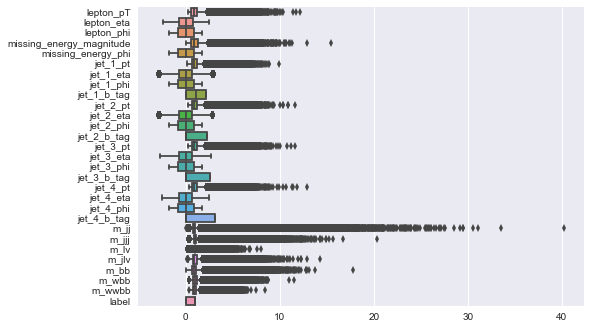

In [9]:
sns.boxplot(data=X, orient='h');

## Feature Importances

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

y = X.pop('label')

gbc = GradientBoostingClassifier(loss='deviance', 
                                 learning_rate=0.1, 
                                 n_estimators=50, 
                                 subsample=1.0, 
                                 criterion='friedman_mse', 
                                 min_samples_split=2, 
                                 min_samples_leaf=1, 
                                 min_weight_fraction_leaf=0.0, 
                                 max_depth=3, 
                                 min_impurity_split=1e-07, 
                                 init=None, 
                                 random_state=123, 
                                 max_features=None, 
                                 verbose=0, 
                                 max_leaf_nodes=None, 
                                 warm_start=False, 
                                 presort='auto')

gbc.fit(X, y)

features = X.columns
importances = gbc.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices[-10:])), importances[indices], color='b', align='center')
plt.yticks(range(len(indices[-10:])), features[indices])
plt.xlabel('Relative Importance');